# Scentific Question: Would dietary emulsifier Sodium Stearoyl Lactylate have an effect on the gut microbiome composition, affecting inflammation phenotype in individuals?

Since dietary emulsiferies have been discovered in the 20th century, they have been used as food additives to bind water soluble and water insoluble components together in food products. Although emulsifers have been approved by the FDA, not much is known to how they affect the gut microbiome despite diet being the greatest contributor to altering the gut microbiome. (Elmen et al., 2020)

The gut microbiome is a highly important component to human immunology as well as disease prevention due to the fact that certain bacterial species in the gut microbiome are able to promote gut barrier function, preventing inflammation phenotype. However, we also find that certain bacterial species produce pro-inflammatory antigens which may cause an inflammation phenotype to be present.

Dietary sodium stearoyl lactylate (SSL) is an important FDA-Approved emulsifer of interest as it is present in a number of food products. However, without much knowledge on SSL, further studies have been conducted to identify its role in altering the gut microbiome.

# Scientific Hypothesis: If dietary emulsifier Sodium Stearoyl Lactylate is present in an individual's diet, then we would see an increased prevalence of pro-inflammatory bacterial species in an individual.

Butyrate is a short-chain fatty acid which is important for promoting gut barrier function due to its function to act as a metaoblite for gut epithelial cells. From Gas Chromatography-Mass Spectroscopy analysis, we identify that bacterial species from the Clostridum family are butyrate producers that are prevalent in our gut microbiome.

To identify the change in microbiome composition, we used In-Vitro studies were done to observe the abundance and growth of Clostridum species when in the presence of SSL. Since the 16S rRNA gene consists of highly conserved nucleotide sequences, interspersed with variable regions that are genus- or species-specific, we can utilze PCR to amplify this region as well as DNA sequencing alignment to determine the expression of the 16S rRNA gene in order to identify the composition of bacterial species in the study (Jenkins et al., 2011).

In the paper, they utilized BLAST (Basic Local Alignment Search Tool) which found regions of similarities from select reference genomes that were on the NCBI website. As a result, through the process of using this tool, they were able to find phenotypic relations between the sequenced results. However, for the sake of this project we will be utilizing pairwise sequencing to simulate BLAST. 

In order to the question if SSL would have an effect on the microbiome with pairwise sequencing, I first had to obtain reference sequences for the 16s rRNA gene for Blautia coccoides (cat. 29138), Clostridium methylpentosum (cat. 5476) and Roseburia intestinalis (cat. 14610). After we would setup an experiment where we would have a superpool bacterial sample treated with a chemically defined media (CDM) and another group treated with SSL + CDM. We would then isolate the DNA, sequence the results which would then give us two results, the SSL group and the control group. We would also obtain the fasta sequence files for both the control bacterial group and the SSL bacteria groups which we can then use pairwise sequencing to obtain a score between 5 bacterial species and the control and SSL groups.

# Downloading and Loading Packages

Biopython (Bio): Collection of Bioinformatics and biology tools that are optimized for python

Seaborn: Data visualization library based on matplotlib

Pandas: Data structures and operations for manipulating numerical tables

Numpy: Adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions

In [2]:
from Bio import Align
import seaborn as sns
import pandas as pd
import numpy as np
import gzip
import shutil

# Importing SRA Files

Here, the SRA Files were incorporated into the jupyter notebook. Although in my original code involved printing of the .gz files, there were thousands of short reads which made it difficult to import to GitHub because the size of the file was too large (72 Mb) compared to not printing the .gz files ~42 kb.

The original code is as listed here:
import gzip

For SSL:
with gzip.open('/Users/ryanl/Desktop/SSL.gz','r') as SSL      
    for line in SSL      
        print(line)

For Control:
with gzip.open('/Users/ryanl/Desktop/Control.gz','r') as Control      
    for line in Control      
        print(line)
        

In [115]:
#Convert SSL gz file to string to incorporate all SRA hits obtained from the SSL group
SSL_gz = gzip.open('/Users/ryanl/Desktop/SSL.gz', 'rb')

In [114]:
#Convert Control gz file to string to incorporate all SRA hits obtained from the control group
Control_gz = gzip.open('/Users/ryanl/Desktop/Control.gz', 'rb')

# Notes about SRA Files
I was unable to obtain the full SRA files listed due to the fact that it required to have an Amazon Web Services (AWS) Account before Downloading SRA sequence data using Amazon Web Services. Because of this, although I had the Fasta sequence names, I was unable to obtain them. As a result of this, I ended up using one of the reads from the SSL group and the Control group to somewhat provide a guide to use as a reference when aligned against the reference genomes. Although these sequences are not nearly as long or detailed as the actual Fasta SRA files.

Control Fasta: s3://sra-pub-src-17/SRR10871364/V12-T1-1_S1_L001_R1_001.fastq.gz.1	
SSL Fasta: s3://sra-pub-src-16/SRR10871389/SSL-T2-1_S32_L001_R1_001.fastq.gz.1	


# Choosing Bacterial Species to Screen
Reference genomes were obtained through NCBI, and these three species were chosen because three of which (B. Coccoides, C. Methylpentosum, and R. Intestinalis) were butyrate producers while two of which were not (E. Coli and E. Faecalis). By observing the change in composition between these groups, we could determine the effect SSL in the media had on changing the composition of the species.

In [121]:
#Create Variables for 16s rRNA Reference Genomes
#Note: fasta sequence for the experiment was not able to be found. We were able to find the SRA .gz files, but the whole constructed sequence was nt able to be found. As a result, 1 SRA for both the Control and SSL groups were taken to be used for this project.
B_coccoides = "AATTGCGCGGCTACCATGCAGTCGAGCGAAGCACTAAGACGGATTTCTTCGGATTGAAGTCTTTGTGACTGAGCGGCGGACGGGTGAGTAACGCGTGGGTAACCTGCCTCATACAGGGGGATAACAGTTAGAAATGACTGCTAATACCGCATAAGCGCACAGGACCGCATGGTCTGGTGTGAAAAACTCCGGTGGTATGAGATGGACCCGCGTCTGATTAGCTAGTTGGAGGGGTAACGGCCCACCAAGGCGACGATCAGTAGCCGGCCTGAGAGGGTGAACGGCCACATTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGAAGGAAGAAGTATCTCGGTATGTAAACTTCTATCAGCAGGGAAGAAAATGACGGTACCTGACTAAGAAGCCCCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGAATAGCAAGTCTGATGTGAAAGGCTGGGGCTTAACCCCAGGACTGCATTGGAAACTGTTGTTCTAGAGTGCCGGAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAATACTAGGTGTCGGGTGGCAAAGCCATTCGGTGCCGCAGCAAACGCAATAAGTATTCCACCTGGGGAGTACGTTCGCAAGAATGAAACTCAAAGGAATTGACGGGGACCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAAGTCTTGACATCCCTCTGACCGTCCCGTAACGGGGACTTCCCTTCGGGGCAGAGGAGACAGGTGGTGCATGGTTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTTATCCTTAGTAGCCAGCACATGATGGTGGGCACTCTAGGGAGACTGCCGGGGATAACCCGGAGGAAGGCGGGGACGACGTCAAATCATCATGCCCCTTATGATTTGGGCTACACACGTGCTACAATGGCGTAAACAAAGGGAAGCGAGACAGCGATGTTGAGCGAATCCCAAAAATAACGTCCCAGTTCGGACTGCAGTCTGCAACTCGACTGCACGAAGCTGGAATCGCTAGTAATCGCGGATCAGAATGCCGCGGTGAATACGTTCCCGGGTCTTGTACACACCGCCCGTCACACCATGGGAGTCAGTAACGCCCGAAGTCAGTGACCTAACCGAAAGGAAGGAGCTGCCGAAGGCGGGACCGATAACTGGGGTGAAGTCGAGCAACGTGAATGC"

C_methylpentosum = "AGGACGAACGCTGGCGGCGCGCCTAACACATGCAAGTCGAACGGAGTTGTTTTGGAGAAGCCCTTCGGGGTGGAACTGATTCAACTTAGTGGCGGACGGGTGAGTAACACGTGAGCAACCTGCCTTACAGAGGGGAATAACGTTTGGAAACGAACGCTAATACCGCATAACATAACGGAATCGCATGGTTTTGTTATCAAAGATTATATCGCTGTAAGATGGGCTCGCGTCTGATTAGATAGTTGGTGAGGTAATGGCTCACCAAGTCGACGATCAGTAGCCGGACTGAGAGGTTGAACGGCCACATTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGAAGGAAGAAGGCCTTCGGGTTGTAAACTTCTGTCTTCAGGGACGATAATGACGGTACCTGAGGAGGAAGCTCCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGAGCGAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGTAGGCGGGATTGCAAGTTGAATGTGAAATCTATGGGCTTAACCCATAAACTGCGTTCAAAACTGCAGTTCTTGAGTGAAGTAGAGGCAGGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCCTGCTGGGCTTTAACTGACGCTGAGGCTCGAAAGCGTGGGTAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGATTACTAGGTGTAGGGGGGTCAACCTTCTGTGCCGGAGTTAACACAATAAGTAATCCACCTGGGGAGTACGACCGCAAGGTTGAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCAGTGGAGTATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGTCTTGACATCCAACTAACGAAGTAGAGATACATTAGGTGCCCTTCGGGGAAAGTTGAGACAGGTGGTGCATGGTTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTTACATTTAGTTGCTACGCAGAGCACTCTAGATGGACTGCCGTTGACAAAACGGAGGAAGGTGGGGATGACGTCAAATCATCATGCCCCTTATGACCTGGGCTACACACGTACTACAATGGCTATTAACAGAGGAAGCAAAACAGTGATGTGGAGCAAACCCCTAAAAATAGTCTCAGTTCGGATTGTAGGCTGCAACTCGCCTACATGAAGCCGGAATTGCTAGTAATCGCGGATCAGCATGCCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGAGAGTTGGCAACACCCGAAGTCAGTAGTCTAACCGCAAGGAGGACGCTGCCGAAGGTGGGG"

R_intestinalis = "TTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGAAGCACTTTATTTGATTTCTTCGGAATGAAGATTTTGTGACTGAGTGGCGGACGGGTGAGTAACGCGTGGGTAACCTGCCTCATACAGGGGGATAACAGTTGGAAACGACTGCTAATACCGCATAAGCGCACAGGGTCGCATGACCTGGTGTGAAAAACTCCGGTGGTATGAGATGGACCCGCGTCTGATTAGCCAGTTGGTGGGGAAACGGCCTACCAAAGCGACGATCAGTAGCCGACCTGAGAGGGTGACCGGCCACATTGGGACTGAGACACGGCCCAAACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGAGCGAAGAAGTATTTCGGTATGTAAAGCTCTATCAGCAGGGAAGAAGAAATGACGGTACCTGACTAAGAAGCACCGGCTTAAATACGTGCCAGCAGCCGCGGTAATACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTACGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGGACTAGAGTGTCGGAGGGGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGATTACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAATACTAGGTGTCGGGGAGCATTGCTCTTCGGTGCCGCAGCAAACGCAATAAGTATTCCACCTGGGGAGTACGTTCGCAAGAATGAAACTCAAAGGAATTGACGGGGACCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAAGTCTTGACATCCCGATGACAGAACATGTAATGTGTTTTCTCTTCGGAGCATCGGTGACAGGTGGTGCATGGTTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCCTATTCTTAGTAGCCAGCGGGTAAGCCGGGCACTCTAGGGAGACTGCCAGGGATAACCTGGAGGAAGGTGGGGATGACGTCAAATCATCATGCCCCTTATGACTTGGGCTACACACGTGCTACAATGGCGTAAACAAAGGGAAGCGAGCCTGCGAGGGGGAGCAAATCTCAAAAATAACGTCTCAGTTCGGACTGCAGTCTGCAACTCGACTGCACGAAGCTGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGTCTTGTACACACCGCCCGTCACACCATGGGAGTTGATAATGCCCGAAGTCAGTGACCCAACCGCAAGGAGGAGCTGCCGAAGGCAGTATCGATAACTGGGGTGAAGTCGTAACACGTA"

E_coli = "GTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAACGGTAACAGGAAGAAGCTTGCTTCTTTGCTGACGAGTGGCGGACGGGTGAGTAATGTCTGGGAAACTGCCTGATGGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATAACGTCGCAAGACCAAAGAGGGGGACCTTCGGGCCTCTTGCCATCGGATGTGCCCAGATGGGATTAGCTAGTAGGTGGGGTAACGGCTCACCTAGGCGACGATCCCTAGCTGGTCTGAGAGGATGACCAGCCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTTGGAGGTTGTGCCCTTGAGGCGTGGCTTCCGGANNTAACGCGTTAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCTGGTCTTGACATCCACGGAAGTTTTCAGAGATGAGAATGTGCCTTCGGGAACCGTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTTGTGAAATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTTATCCTTTGTTGCCAGCGGTCCGGCCGGGAACTCAAAGGAGACTGCCAGTGATAAACTGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGACCAGGGCTACACACGTGCTACAATGGCGCATACAAAGAGAAGCGACCTCGCGAGAGCAAGCGGACCTCATAAAGTGCGTCGTAGTCCGGATTGGAGTCTGCAACTCGACTCCATGAAGTCGGAATCGCTAGTAATCGTGGATCAGAATGCCACGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCAAAAGAAGTAGGTAGCTTAACTTCGGGAGGGC"

E_faecalis = "AGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAACGCTTCTTTCCTCCCGAGTGCTTGCACTCAATTGGAAAGAGGAGTGGCGGACGGGTGAGTAACACGTGGGTAACCTACCCATCAGAGGGGGATAACACTTGGAAACAGGTGCTAATACCGCATAACAGTTTATGCCGCATGGCATAAGAGTGAAAGGCGCTTTCGGGTGTCGCTGATGGATGGACCCGCGGTGCATTAGCTAGTTGGTGAGGTAACGGCTCACCAAGGCCACGATGCATAGCCGACCTGAGAGGGTGATCGGCCACACTGGGACTGAGACACGGCCCAGACTCTACGGGAGGCAGCAGTAGGGAATCTTCGGCAATGGACGAAAGTCTGACCGAGCAACGCCGCGTGAGTGAAGAAGGTTTTCGGATCGTAAAACTCTGTTGTTAGAGAAGAACAAGGACGTTAGTAACTGAACGTCCCCTGACGGTATCTAACCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTCTTAAGTCTGATGTGAAAGCCCCCGGCTCAACCGGGGAGGGTCATTGGAAACTGGGAGACTTGAGTGCAGAAGAGGAGAGTGGAATTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAGGAACACCAGTGGCGAAGGCGGCTCTCTGGTCTGTAACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAGTGCTAAGTGTTGGAGGGTTTCCGCCCTTCAGTGCTGCAGCAAACGCATTAAGCACTCCGCCTGGGGAGTACGACCGCAAGGTTGAAACTCAAAGGAATTGACGGGGGCCCGACAAGCGGTGGAGCATGTGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGTCTTGACATCCTTTGACCACTCTAGAGATAGAGCTTTCCCTTCGGGGACAAAGTGACAGTGGTGCATGGTTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCGCAACGAGCGCAACCCTTATTGTTAGTTGCCATCATTTAGTTGGGCACTCTAGCGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAATCATCATGCCCCTTATGACCTGGGCTACACACGTGCTACAATGGGAAGTACAACGAGTCGCTAGACCGCGAGGTCATGCAAATCTCTTAAAGCTTCTCTCAGTTCGGATTGCAGGCTGCAACTCGCCTGCATGAAGCCGGAATCGCTAGTAATCGCGGATCAGCACGCCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACACCCGAAGTCGGTGAGGTAACCTTTTTGGAGCCAGCCGCCTAAGGTGGGATAGATGATTTGGGTGAAGTCGTAACAAGGTAACC"

Control = "CCTACGGGGGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTACTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTT"

SSL= "CCTACGGGGGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGATGAAGGCCTTCGGGTTTTTAAGTTCTTTTTGTGTGGTGGTAGGGTGTTTTGTTTATACCTTTTTTTATTGACGTTACCCGCAGTTGTAGCATCGTCTTTCTCCGTGCCTGCAGCTTCTTTTTTACGTCTGGTGCTTGCGTTAATCTGTTTTTCTTTGCTTTTTGCTCTTGCTGTCTTTTTTCCTCCTCTTTTCTCTCCTCCTTTTTTC"

print(B_coccoides)

print(C_methylpentosum)

print(R_intestinalis)

print(Control)

print(SSL)

AATTGCGCGGCTACCATGCAGTCGAGCGAAGCACTAAGACGGATTTCTTCGGATTGAAGTCTTTGTGACTGAGCGGCGGACGGGTGAGTAACGCGTGGGTAACCTGCCTCATACAGGGGGATAACAGTTAGAAATGACTGCTAATACCGCATAAGCGCACAGGACCGCATGGTCTGGTGTGAAAAACTCCGGTGGTATGAGATGGACCCGCGTCTGATTAGCTAGTTGGAGGGGTAACGGCCCACCAAGGCGACGATCAGTAGCCGGCCTGAGAGGGTGAACGGCCACATTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGAAGGAAGAAGTATCTCGGTATGTAAACTTCTATCAGCAGGGAAGAAAATGACGGTACCTGACTAAGAAGCCCCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGAATAGCAAGTCTGATGTGAAAGGCTGGGGCTTAACCCCAGGACTGCATTGGAAACTGTTGTTCTAGAGTGCCGGAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAATACTAGGTGTCGGGTGGCAAAGCCATTCGGTGCCGCAGCAAACGCAATAAGTATTCCACCTGGGGAGTACGTTCGCAAGAATGAAACTCAAAGGAATTGACGGGGACCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAAGTCTTGACATCCCTCTGACCGTCCCGTAACGGGGACTTCCCTTCGGGGCAGAGGAGACAGGTGG

In [122]:
#Using align, generate a pairwise alignment between control group and reference B. Coccoides
aligner = Align.PairwiseAligner()
alignments = aligner.align(Control,B_coccoides)
print(alignments.score)

251.0


In [123]:
#Using align, generate a pairwise alignment between SSL emulsifer group and reference B. Coccoides
aligner = Align.PairwiseAligner()
alignments = aligner.align(SSL, B_coccoides)
print(alignments.score)

279.0


In [67]:
#Using align, generate a pairwise alignment between control group and reference C. Methylpentosum
aligner = Align.PairwiseAligner()
alignments = aligner.align(Control,C_methylpentosum)
print(alignments.score)

251.0


In [66]:
#Using align, generate a pairwise alignment between SSL emulsifer group and reference C. Methylpentosum
aligner = Align.PairwiseAligner()
alignments = aligner.align(SSL,C_methylpentosum)
print(alignments.score)

279.0


In [76]:
#Using align, generate a pairwise alignment between control group and reference R. Intestinalis
aligner = Align.PairwiseAligner()
alignments = aligner.align(Control,R_intestinalis)
print(alignments.score)

251.0


In [64]:
#Using align, generate a pairwise alignment between SSL emulsifer group and reference R. Intestinalis
aligner = Align.PairwiseAligner()
alignments = aligner.align(SSL,R_intestinalis)
print(alignments.score)

279.0


In [86]:
#Using align, generate a pairwise alignment between control group and reference R. Intestinalis
aligner = Align.PairwiseAligner()
alignments = aligner.align(Control,E_coli)
print(alignments.score)

251.0


In [85]:
#Using align, generate a pairwise alignment between SSL emulsifer group and reference R. Intestinalis
aligner = Align.PairwiseAligner()
alignments = aligner.align(SSL,E_coli)
print(alignments.score)

279.0


In [87]:
#Using align, generate a pairwise alignment between control group and reference R. Intestinalis
aligner = Align.PairwiseAligner()
alignments = aligner.align(Control,E_faecalis)
print(alignments.score)

251.0


In [88]:
#Using align, generate a pairwise alignment between SSL emulsifer group and reference R. Intestinalis
aligner = Align.PairwiseAligner()
alignments = aligner.align(SSL,E_faecalis)
print(alignments.score)

279.0


# Create Heatmap to plot the relative abundance of Each Bacterial species after the addtion of SSL

Here, I created a heatmap to represent the SSL and Control pairwise score relative to one another. In order to do this, a dictionary was first created in order to setup a dataframe containing the variables and keys. After, we could then utilize this Dataframe to construct the rows and columns of the heatplot. 

In [106]:
# Create a Dictionary for Mapping
#Group order [Control, SSL]
B_Coccoides= [251,279]
C_Methylpentosum= [251,279]
R_Intestinalis= [251,279]
E_Coli= [251,279]
E_Faecalis= [251,279]
map={"B. Coccoides": B_Coccoides, "C. Methylpentosum": C_Methylpentosum, "R. Intestinalis": R_Intestinalis, "E. Coli":E_Coli, "E. Faecalis":E_Faecalis}
pd.DataFrame(map)

,B. Coccoides,C. Methylpentosum,R. Intestinalis,E. Coli,E. Faecalis
0,251,251,251,251,251
1,279,279,279,279,279


<AxesSubplot:>

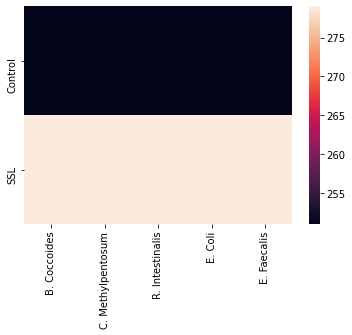

In [107]:
#Create Dataset for Mapping
seq = pd.DataFrame(map, columns = ["B. Coccoides","C. Methylpentosum","R. Intestinalis", "E. Coli","E. Faecalis"])
#Plot Heatmap
sns.heatmap(seq, yticklabels=["Control","SSL"])

# Analysis of Heatmap
From the results, we find that all SSL species had a pairwise score of 279 while all the control species had a pariwise score of 251. This scoring method identifies that the SSL group scored higher than the Control group, indicating that there were a greater number of basepair matches and fewer mismatches or gaps in the SSL group compared to the control group. From the scoring method, it was identified that within each sample the bacteria composition were of equal proportions due to the fact that the pairwise alignment score was the same throughout each group. Although it differed between the control group and the SSL group, the values remained consistent within each group. With this, we can conclude that SSL does not in fact change the composition of the bacterial groups, which helps us understand that the hypothesis is false.

Unfortunately, due to the fact that I was unable to obtain the exact fasta sequences for the control and SSL groups, the results are skewed from myself only using a single SRA. If I were to have the full sequence, we would see a varation between the SSL and control reads compared to each bacterial group as the composition changes with more variance. This is because the composition of B. Coccoides, C. Methylpentosum, R. Intestinalis, E. Coli, and E. Faecalis do not change linearly and the addition of SSL would have had an effect on the composition of the groups. In addition, we would have probably seen initial variation of reads and composition in the control grop, leading us to understand how SSL plays a role in shaping the growth of these groups. The Elmen paper was able to highlight these differences and point out that SSL in fact did decrease the number of bacterial butyrate producers.